 Load the Titanic Dataset

In [ ]:
import pandas as pd


df = pd.read_csv("data/Titanic.csv")

df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Explore and Understand the Dataset

In [3]:


print("Shape of dataset:", df.shape)

df.info()


df.describe(include='all')


Shape of dataset: (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


Forward Fill and Backward Fill on Age

In [4]:

df['Age_ffill'] = df['Age'].fillna(method='ffill')
df['Age_bfill'] = df['Age'].fillna(method='bfill')

df[['Age', 'Age_ffill', 'Age_bfill']].head()


C:\Users\mohan\AppData\Local\Temp\ipykernel_13856\3533750563.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Age_ffill'] = df['Age'].fillna(method='ffill')
C:\Users\mohan\AppData\Local\Temp\ipykernel_13856\3533750563.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Age_bfill'] = df['Age'].fillna(method='bfill')


,Age,Age_ffill,Age_bfill
0,22.0,22.0,22.0
1,38.0,38.0,38.0
2,26.0,26.0,26.0
3,35.0,35.0,35.0
4,35.0,35.0,35.0


Fill Missing Values in Cabin with “unknown” Limit=5

In [5]:


df['Cabin'] = df['Cabin'].fillna('unknown', limit=5)


df['Cabin'].head(10)


0    unknown
1        C85
2    unknown
3       C123
4    unknown
5    unknown
6        E46
7    unknown
8        NaN
9        NaN
Name: Cabin, dtype: object

 Remove Duplicate Records

In [6]:


duplicates = df.duplicated().sum()
print("Duplicate Records:", duplicates)


df = df.drop_duplicates()

print("Shape after removing duplicates:", df.shape)


Duplicate Records: 0
Shape after removing duplicates: (891, 14)


Encode Categorical Column `Sex` using LabelEncoder

In [7]:

from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()

df['Sex_encoded'] = le.fit_transform(df['Sex'])


df[['Sex', 'Sex_encoded']].head()


,Sex,Sex_encoded
0,male,1
1,female,0
2,female,0
3,female,0
4,male,1


Scale Numerical Feature `Fare` using StandardScaler

In [8]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df['Fare_scaled'] = scaler.fit_transform(df[['Fare']])


df[['Fare', 'Fare_scaled']].head()


,Fare,Fare_scaled
0,7.2500,-0.502445
1,71.2833,0.786845
2,7.9250,-0.488854
3,53.1000,0.420730
4,8.0500,-0.486337


Pair Plot of Selected Features

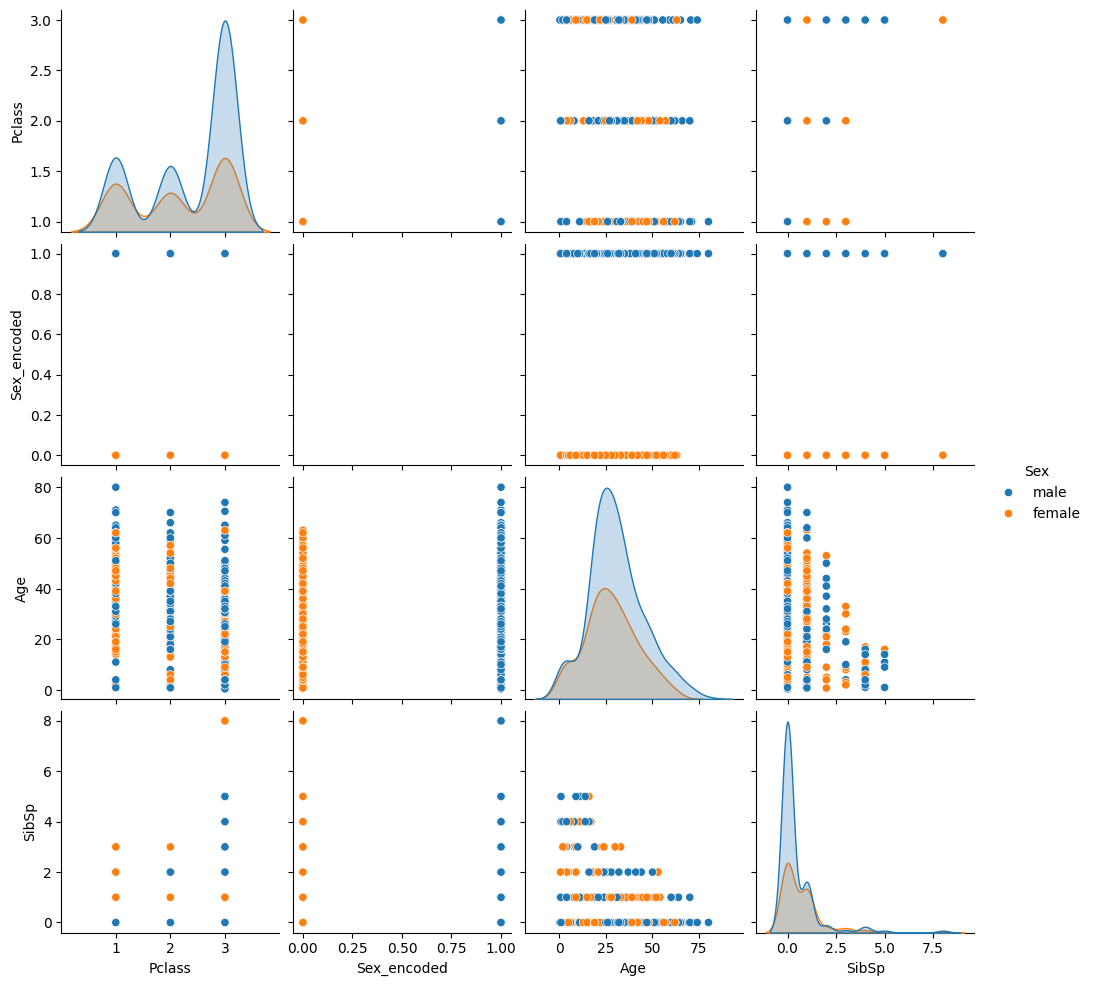

In [9]:

import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, vars=['Pclass', 'Sex_encoded', 'Age', 'SibSp'], hue='Sex')
plt.show()


Correlation Heatmap

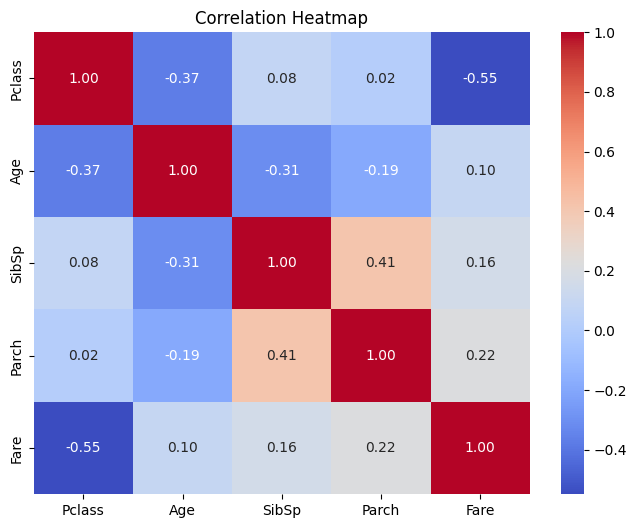

In [10]:

corr_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
corr_matrix = df[corr_features].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
